In [23]:
import pandas as pd

# Define the paths to your CSV files
csv_file_path_1 = '../data.csv'
csv_file_path_2 = '../AEcodiert240430_UTF8.csv'
csv_file_path_3 = '../meddra_zkls.csv'
csv_file_path_4 = '../meddra_zkls2.csv'

# Read the CSV files into DataFrames
try:
    df1 = pd.read_csv(csv_file_path_1, delimiter=';', encoding='utf-8')
    df2 = pd.read_csv(csv_file_path_2, delimiter=';', encoding='utf-8')
    df3 = pd.read_csv(csv_file_path_3, delimiter=';', encoding='utf-8')
    df4 = pd.read_csv(csv_file_path_4, delimiter=';', encoding='utf-8')

except FileNotFoundError as e:
    print(e)
    exit()
#concat all the dataframes
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the first few rows of the concatenated DataFrame to verify
print("First few rows of the concatenated DataFrame:")
print(df.head())  # Display the first few rows of the concatenated DataFrame

print("Columns in DataFrame:")
print(df.columns)

print("Shape of DataFrame 1:")
print(df1.shape)
print("Shape of DataFrame 2:")
print(df2.shape)
print("Shape of DataFrame 3:")
print(df3.shape)
print("Shape of DataFrame 4:")
print(df4.shape)

print("Shape of concatenated DataFrame:")
print(df.shape)

First few rows of the concatenated DataFrame:
   llt_code                   ae_description
0  10000001          Ventilationspneumonitis
1  10000002        11-Beta-Hydroxylasemangel
2  10000003      11-Oxysteroidaktivitaet erh
3  10000004  11-Oxysteroidaktivitaet erhoeht
4  10000005          17-Ketosteroide im Urin
Columns in DataFrame:
Index(['llt_code', 'ae_description'], dtype='object')
Shape of DataFrame 1:
(88345, 2)
Shape of DataFrame 2:
(1171, 2)
Shape of DataFrame 3:
(990, 2)
Shape of DataFrame 4:
(23107, 2)
Shape of concatenated DataFrame:
(113613, 2)


In [24]:
# Function to split and expand DataFrame
def split_and_expand_df(df):
    def split_row(row):
        llt_code_list = str(row['llt_code']).split(',')
        return pd.DataFrame({'llt_code': llt_code_list, 'ae_description': row['ae_description']})

    df = df.apply(split_row, axis=1)
    df = pd.concat(df.tolist(), ignore_index=True)
    return df

expanded_df = split_and_expand_df(df)

In [29]:
import matplotlib.pyplot as plt

counts = []
# Assuming df is your DataFrame

# Calculate value counts
value_counts = expanded_df['llt_code'].value_counts()


# Create a word cloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is your DataFrame

# Calculate value counts
value_counts = expanded_df['llt_code'].value_counts()

dfcounts = expanded_df.llt_code.value_counts()
print (dfcounts)

# Neues DataFrame erstellen, indem die Series dfcounts in einen DataFrame umgewandelt wird
df_counts_df = pd.DataFrame({'Code': dfcounts.index, 'Häufigkeit': dfcounts.values})

# Nur Codes mit einer Häufigkeit größer als 1 behalten
df_counts_df = df_counts_df[df_counts_df['Häufigkeit'] > 100]

import matplotlib.pyplot as plt

# Pie-Chart erstellen
plt.pie(df_counts_df['Häufigkeit'], labels=df_counts_df['Code'], autopct='%1.1f%%')
plt.title('Häufigkeit der Codes (mind. 100x)')
plt.show()

llt_code
10084268     232
10021789     142
10049924     141
10033371     140
10028391     126
            ... 
10032092       1
10032091       1
10032090       1
10032089       1
 10012374      1
Name: count, Length: 88585, dtype: int64


KeyboardInterrupt: 

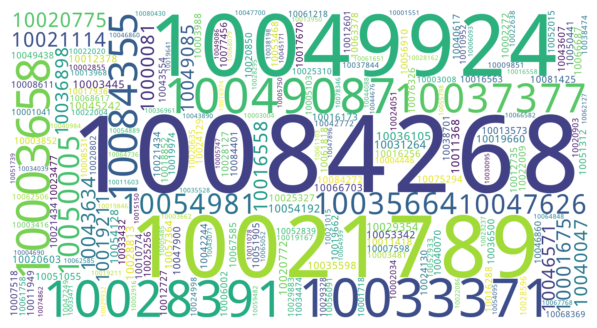

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is your DataFrame

# Calculate value counts
value_counts = expanded_df['llt_code'].value_counts()

# Create a word cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(value_counts)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()